<a href="https://colab.research.google.com/github/Harshavalmiki/CMPE-257--ML/blob/main/Hw3_Classification%2C_Mullerloop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257 - Machine Learning - Assignment 4 - Classification, Amalgamation, and Confusion

Team Name: Geek squad

Student Name : Harshavardhan Valmiki

SJSU ID: 017442984

Business Objective: To predict housing prices inorder to offer insights for prospective investors and home buyers to determine the viability of investing in California real estate.

Datasets: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table

import seaborn as seabornInstance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", message="Variables are collinear")

warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [ ]:
import pandas as pd
# Load data from CSV
file_path = "cali_housing.csv"
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total rooms/household,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,7.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,6.2,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,8.3,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,5.8,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,6.3,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,5.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,6.1,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,5.2,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,5.3,741,349,1.8672,84700,INLAND


In [ ]:
# Display basic statistics and information
print(data.describe())
print(data.info())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms  total rooms/household    population    households  \
count    20433.000000           20640.000000  20640.000000  20640.000000   
mean       537.870553               5.428983   1425.476744    499.539680   
std        421.385070               2.474323   1132.462122    382.329753   
min          1.000000               0.800000      3.0000

**Handle Missing Values and performing one-hot encoding**:

To handle missing values in a dataset, we first identify columns with missing data and decide on an appropriate strategy, such as imputation or dropping. Imputation involves filling missing values with statistical measures like mean or median, while dropping removes rows or columns with missing data. One-hot encoding is a technique used to convert categorical variables into binary columns, making them suitable for machine learning algorithms. This process involves identifying categorical features, encoding them using methods like Pandas' get_dummies(), and merging the encoded features with the original dataset. In Python, these tasks can be accomplished efficiently using libraries like Pandas.






In [ ]:
# Handle missing values (if any)
data.dropna(inplace=True)

# Encode categorical feature 'ocean_proximity'
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total rooms/household,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,7.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,6.2,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,8.3,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,5.8,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,6.3,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,5.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,6.1,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,5.2,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,5.3,741,349,1.8672,84700,1,0,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'total rooms/household'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >]], dtype=object)

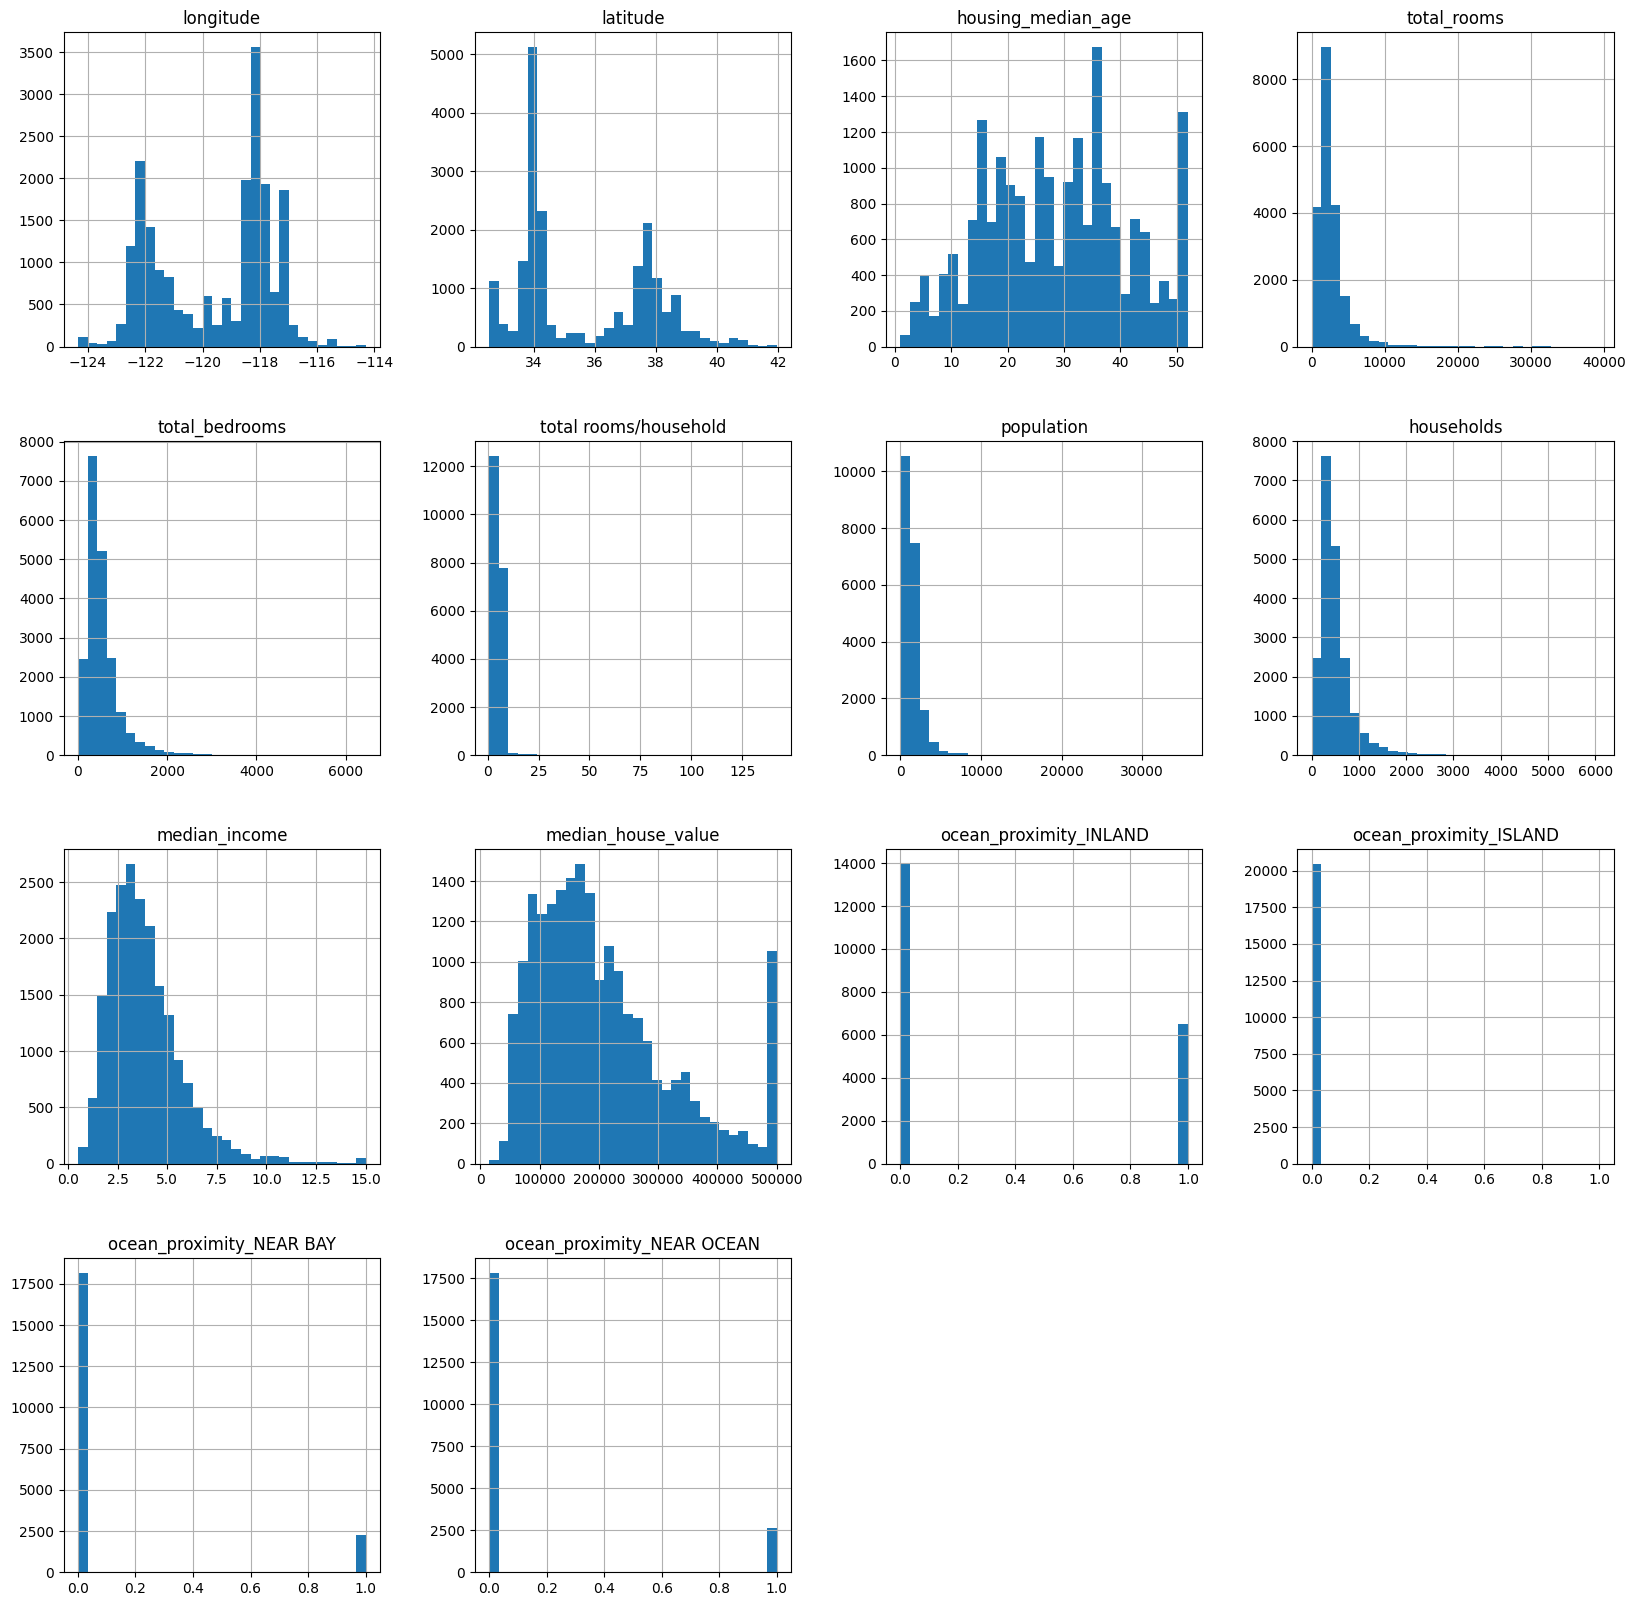

In [ ]:
data.hist(bins=30,figsize=[20,20])

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

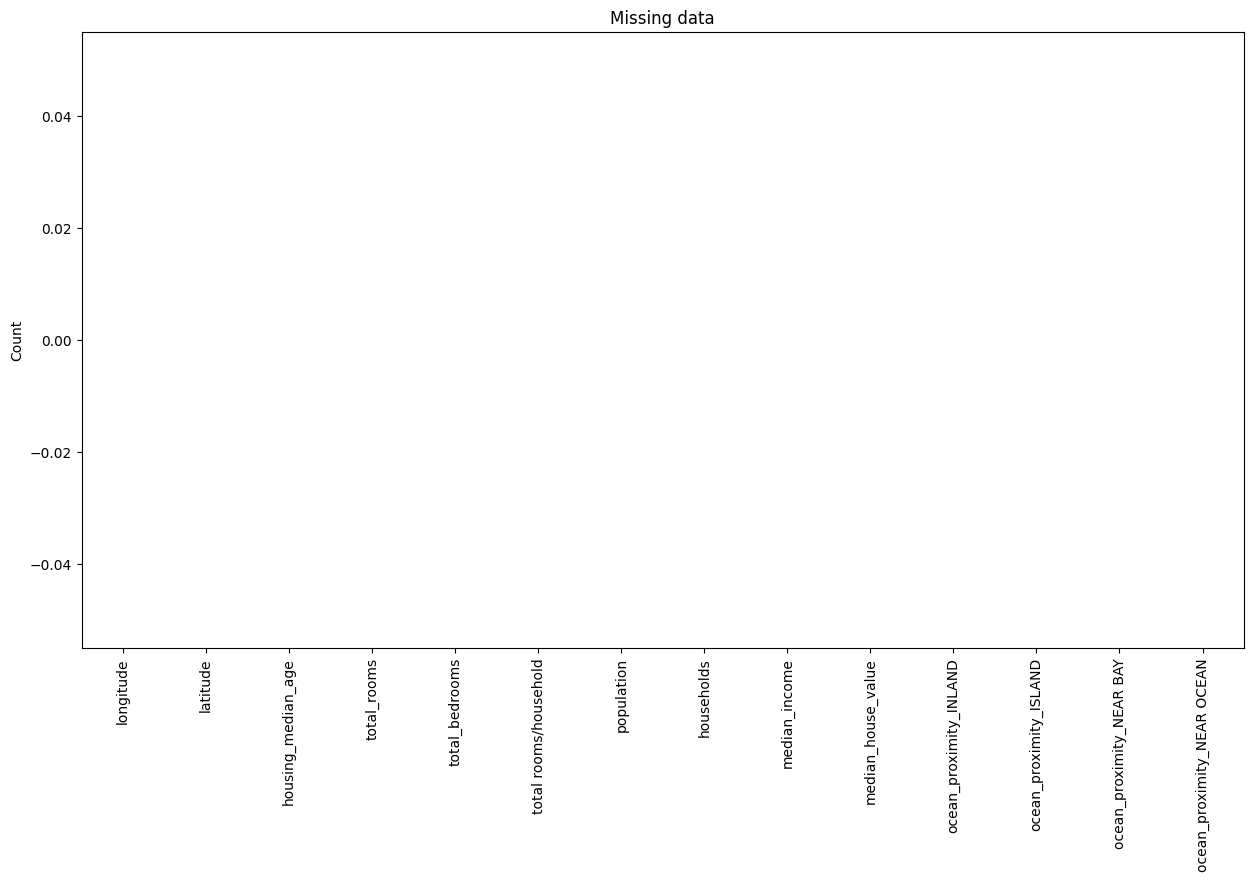

In [ ]:

plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

In [ ]:
data.duplicated().any()

False

In [ ]:
data = data.drop_duplicates() #No Missing data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  int64  
 3   total_rooms                 20433 non-null  int64  
 4   total_bedrooms              20433 non-null  float64
 5   total rooms/household       20433 non-null  float64
 6   population                  20433 non-null  int64  
 7   households                  20433 non-null  int64  
 8   median_income               20433 non-null  float64
 9   median_house_value          20433 non-null  int64  
 10  ocean_proximity_INLAND      20433 non-null  uint8  
 11  ocean_proximity_ISLAND      20433 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20433 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  204

In [ ]:
data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
total rooms/household         0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# **Logistic Regression on the main dataset**

**To classify expensive houses in the bay area**

In [ ]:
import matplotlib.pyplot as plt

# Calculate the median
price_median = data['median_house_value'].median()
print(f"The median age is: {price_median}")




The median age is: 179700.0


In [ ]:
import matplotlib.pyplot as plt

# Calculate the median
age= data['housing_median_age'].median()
print(f"The median price is: {age}")

The median price is: 29.0


<Axes: >

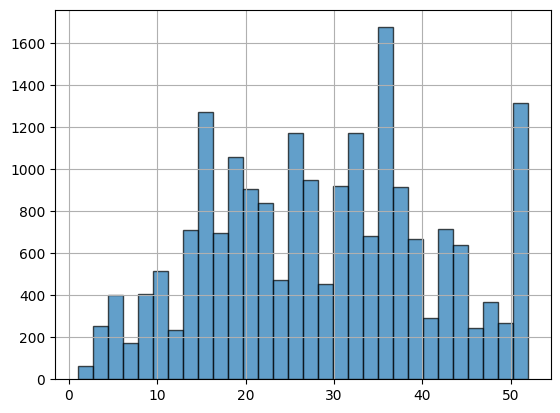

In [ ]:
# Plot the distribution of the "PRICE" column with a vertical line indicating the median
plt.figure()
data['housing_median_age'].hist(bins=30, edgecolor='k', alpha=0.7)

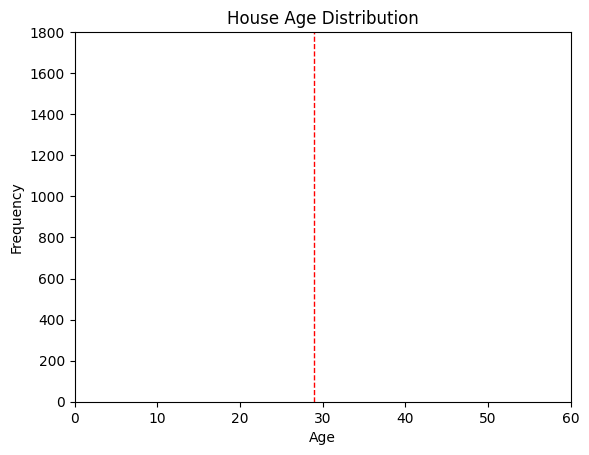

In [ ]:

plt.axvline(age, color='r', linestyle='dashed', linewidth=1)
plt.xlim(0,60)
plt.ylim(0, 1800)
plt.title('House Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
df = data.copy()


In [ ]:
#Selecting the data which was present in the main dataset
features_to_use = ['housing_median_age','total_rooms','total_bedrooms','median_income','median_house_value']

df = df[features_to_use]
df['old'] = np.where(df['housing_median_age']>40,1,0)
df

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,old
0,41,880,129.0,8.3252,452600,1
1,21,7099,1106.0,8.3014,358500,0
2,52,1467,190.0,7.2574,352100,1
3,52,1274,235.0,5.6431,341300,1
4,52,1627,280.0,3.8462,342200,1
...,...,...,...,...,...,...
20635,25,1665,374.0,1.5603,78100,0
20636,18,697,150.0,2.5568,77100,0
20637,17,2254,485.0,1.7000,92300,0
20638,18,1860,409.0,1.8672,84700,0


# **2. Muller Loop on the main dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time


In [ ]:
old_or_not_0_count = (df['old'] == 0).sum()
print("Number of rows with old as 0:", old_or_not_0_count)

Number of rows with old as 0: 16593


In [ ]:
def mullerclassifierloop(data):
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(2),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        #     GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    X =  StandardScaler().fit_transform(data.drop(columns='old'))
    y = data['old'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    results = []  # Store results in a list of dictionaries
    max_score = 0.0
    max_class = ''

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)
        pred = clf.predict(X_train)
        # F1 Score matrix
        f1 = f1_score(y_train, pred, average='macro')
        print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
        print('F1 SCORE = %.2f,' %(f1))

        # Append results to the list
        results.append({'Classifier': name, 'Accuracy': score, 'F1 Score': f1})

        fig, ax = plt.subplots()
        # Confusion matrix
        cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        cm.poof()

        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

    print(80*'-' )
    print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
    print(80*'-' )

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df



In [ ]:

# Assume 'data' is your DataFrame
features_to_use = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
X, y = data[features_to_use], df['old']

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

results = []
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

max_score = 0.0
max_class = ''

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    results.append({'Classifier': name, 'Accuracy': score})
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name


print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))





Classifier = Nearest Neighbors, Score (test, accuracy) = 97.63, Training time = 1.12 seconds
Classifier = Linear SVM, Score (test, accuracy) = 99.98, Training time = 4.13 seconds
Classifier = RBF SVM, Score (test, accuracy) = 98.61, Training time = 10.68 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.02 seconds
Classifier = Random Forest, Score (test, accuracy) = 99.44, Training time = 0.11 seconds
Classifier = Neural Net, Score (test, accuracy) = 99.73, Training time = 4.48 seconds
Classifier = AdaBoost, Score (test, accuracy) = 100.00, Training time = 0.03 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 94.27, Training time = 0.01 seconds
Classifier = QDA, Score (test, accuracy) = 96.11, Training time = 0.01 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


In [ ]:

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

results_df

,Classifier,Accuracy
0,Nearest Neighbors,97.626621
1,Linear SVM,99.975532
2,RBF SVM,98.605334
3,Decision Tree,100.000000
4,Random Forest,99.437240
5,Neural Net,99.730854
6,AdaBoost,100.000000
7,Naive Bayes,94.274529
8,QDA,96.109616


# **3.Desicion Tree**